In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

First I imported the data from the .csv file

In [2]:
df = pd.read_csv("./medical_examination.csv")

Then I added the 'overweight' column.

In [3]:
df["overweight"]= np.where(df["weight"] / (df["height"] * df["height"]) * 10000 > 25, 1, 0,)

I then normalized the data by making 0 always good and 1 always bad. Also if the value of 'gluc' or 'cholestral' was 1 I made it 0 and if it was more than 1, I made it 1.

In [4]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

Drawing the categorical plot

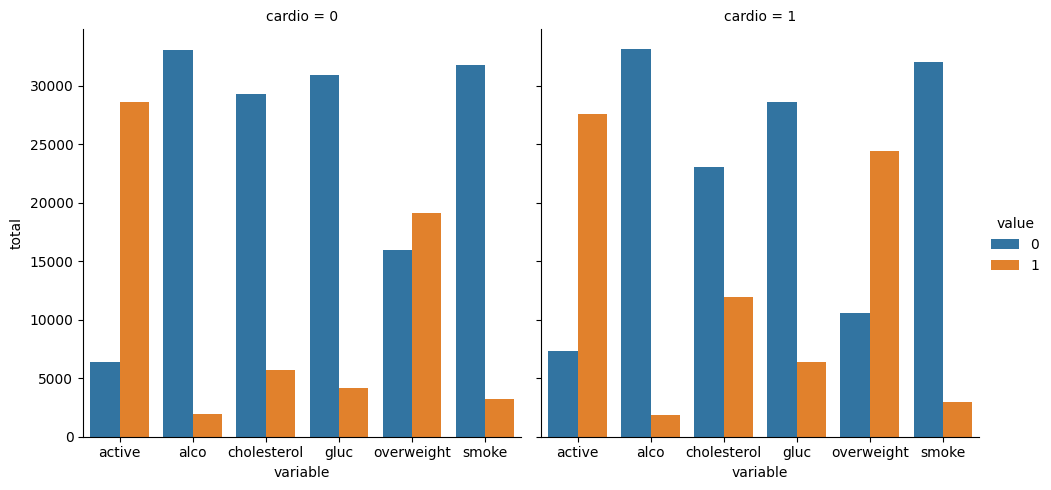

In [5]:

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
vars = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
  
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = vars)


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.groupby(["variable","value","cardio"])["value"].count().reset_index(name="total")

    # Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data = df_cat,x = "variable", y = "total", hue = "value", col = "cardio"  ,kind = "bar", order = vars,)
fig.set_ylabels("total")
fig.set_xlabels("variable")


    # Get the figure for the output
fig = fig.fig 


   

Drawing the heatmap

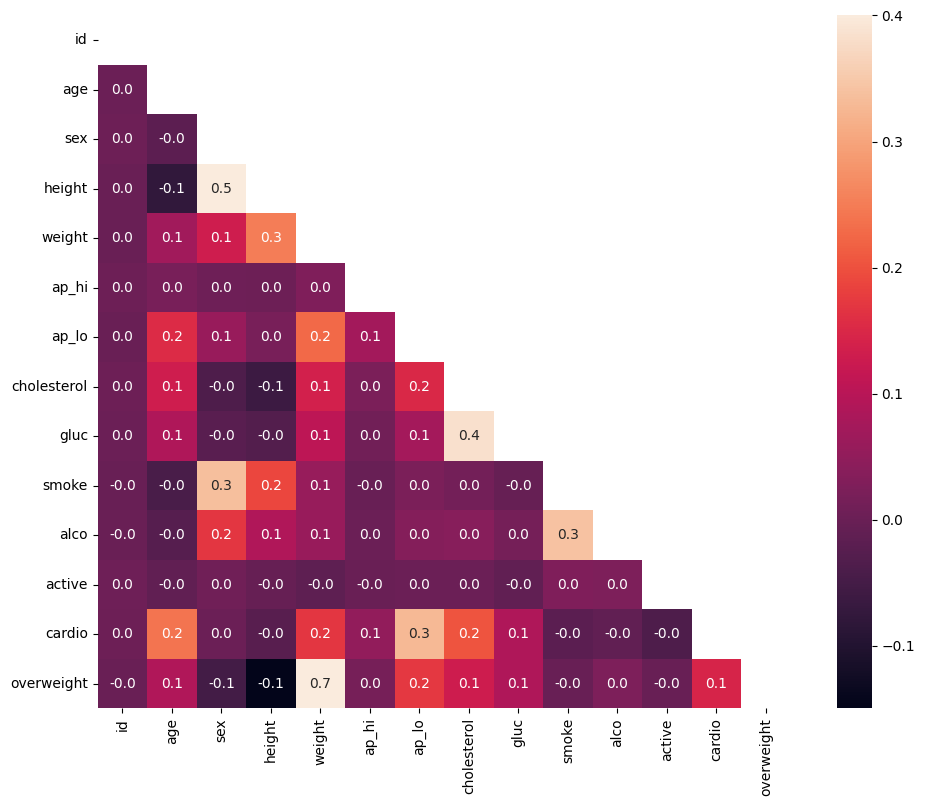

In [6]:
# Clean the data
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df["height"] <= df["height"].quantile(0.975)) & (df["weight"] >= df["weight"].quantile(0.025)) & (df["weight"] <= df["weight"].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

  
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap with 'sns.heatmap()'

ax = sns.heatmap(data = corr, mask=mask, vmax=0.4, square=True, fmt=".1f", annot=True,)

